# Linear Regression with Python Scikit Learn
   We'll first load the data we'll be learning from and visualizing it, at the same time performing Exploratory Data Analysis. Then, we'll pre-process the data and build models to fit it (like a glove). This model is then evaluated, and if favorable, used to predict new values based on new input.

In [10]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


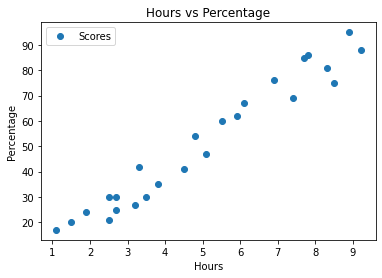

In [5]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')
plt.ylabel("Percentage")
plt.show()

Our variables express a linear relationship

## Splitting Data for Training and Testing(EDA)
   Now, we can divide our data in two arrays - one for the dependent feature and one for the independent, or target feature.
    

In [8]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [17]:
reg = linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [18]:
#TRAINING THE MODEL
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
#coeff of each feature
print(reg.coef_)

[9.91643714]


In [42]:
#intercept
print(reg.intercept_)

2.2441840561442774


In [20]:
print("Training complete.")

Training complete.


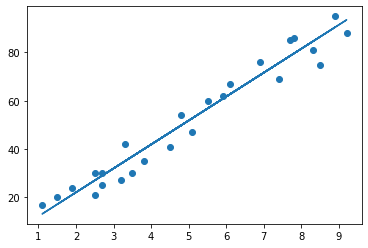

In [22]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x,line);
plt.show()

## Making Predictions
    To make predictions on the test data, we pass the X_test values to the predict() method.

In [23]:
print(x_test)
y_pred = reg.predict(x_test) # Predicting the scores
print(y_pred)

[[6.9]
 [9.2]
 [7.4]
 [1.5]
 [4.5]
 [2.5]
 [4.8]]
[70.66760033 93.47540575 75.6258189  17.11883977 46.86815119 27.03527691
 49.84308233]


Though our model seems not to be very precise, the predicted percentages are close to the actual ones. Let's quantify the difference between the actual and predicted values to gain an objective view of how it's actually performing.

In [24]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,76,70.667600
1,88,93.475406
2,69,75.625819
3,20,17.118840
4,41,46.868151
5,21,27.035277
6,54,49.843082


In [45]:
# You can also test with your own data
hours = [[9]]
own_pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9]]
Predicted Score = 91.49211832625305


## Evaluating the model
    After looking at the data, seeing a linear relationship, training and testing our model, we can understand how well it predicts by using some metrics. For regression models, three evaluation metrics are mainly used:
    1.Mean Absolute Error (MAE)
    2.Mean Squared Error (MSE)
    3.Root Mean Squared Error (RMSE)
    

In [46]:
from sklearn import metrics  
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 

In [47]:
print('Mean absolute error: ',mae)
print('Mean squared error: ',mse)
print('Root mean squared error: ',rmse)

Mean absolute error:  5.196447189117931
Mean squared error:  28.393835008465
Root mean squared error:  5.328586586372131
